In [ ]:
import numpy as np
import scipy as sp
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set(font_scale=1.3)

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

# Метод главных компонент
### (Principal component analysis, PCA)

<a href="https://www.youtube.com/watch?v=JEYLfIVvR9I">It had to be U - the SVD song</a> --- веселая песенка :)

**Explained Visually (a setosa project):**

<a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis</a>

<a href="http://setosa.io/ev/eigenvectors-and-eigenvalues/">Eigenvectors and Eigenvalues</a>

## SVD-разложение

Генерируем датасет.

In [ ]:
X = sp.stats.uniform.rvs(size=(100, 10))
print(X.shape)

(100, 10)


Вот так можно вычислять сингулярное разложение.

In [ ]:
U, D, V = sp.linalg.svd(X, full_matrices=False)
print(U.shape, D.shape, V.shape)

(100, 10) (10,) (10, 10)


Проверим, что получилось. Восстановим датасет и сравним с исходной версией.

In [ ]:
X_restored = np.dot(U, np.dot(D * np.eye(10), V))
print(np.allclose(X_restored, X))


True


## PCA

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA">`sklearn.decomposition.PCA`</a>`(n_components=None)`

Методы:
* `fit(X)` --- обучиться на данных `X`;
* `fit_transforn(X)` --- обучиться на данных `X` и вернуть сжатое представление `X`;
* `transform(X_new)` --- вернуть сжатое представление `X_new` для обученной ранее модели;
* `inverse_transform(Y)` --- восстановить сжатые данные `Y` в исходное пространство.

Атрибуты:

* `components_` --- главные компоненты в порядке убывания собственных чисел, размер (n_components, n_features);
* `explained_variance_` --- дисперсия вдоль главных компонент, равны собственным числам, размер (n_components,);
* `explained_variance_ratio_` --- доля дисперсии, объясняемая каждой компонентой, размер (n_components,);
* `mean_` --- среднее по данным, размер (n_components,);
* `noise_variance_` --- оценка дисперсии шума для метода Probabilistic PCA.

Другие модификации, реализованные в sklearn:

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA">`KernelPCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA">`SparsePCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA">`IncrementalPCA`</a>.

Генерируем двумерный датасет.

In [ ]:
X = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 3], 
                                     cov=[[3, 1], [1, 1]])

Применяем PCA с одной главной компонентой.

In [ ]:
pca = PCA(n_components=1)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)

Его главные компоненты (точнее, одна компонента) — двумерные векторы.

In [ ]:
pca.components_

array([[0.9206268 , 0.39044371]])

Вектор средних:

In [ ]:
pca.mean_

array([-0.07127607,  2.94952371])

На первом графике синим отмечены исходные точки, красным - они же после проецирования и обратного преобразования.
На втором графике точки в одномерном пространстве.

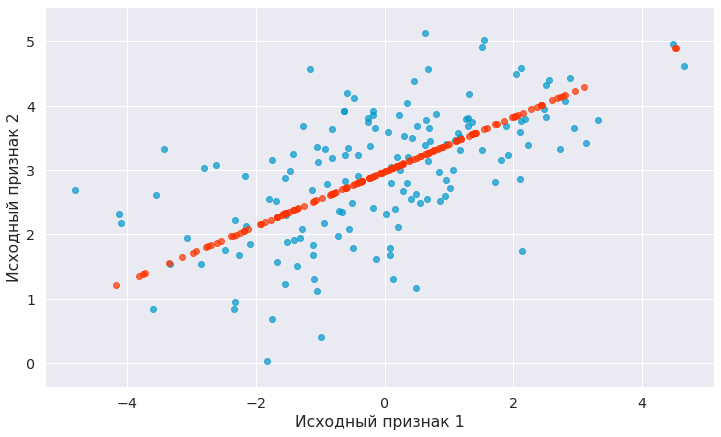

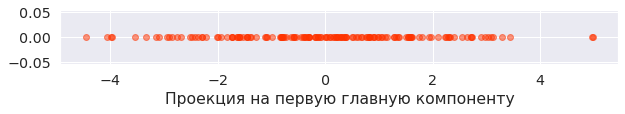

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
plt.scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), alpha=0.5, color=red)
plt.xlabel('Проекция на первую главную компоненту')
plt.show()

Сгенерируем и визуализируем есть два хорошо разделимых класса.

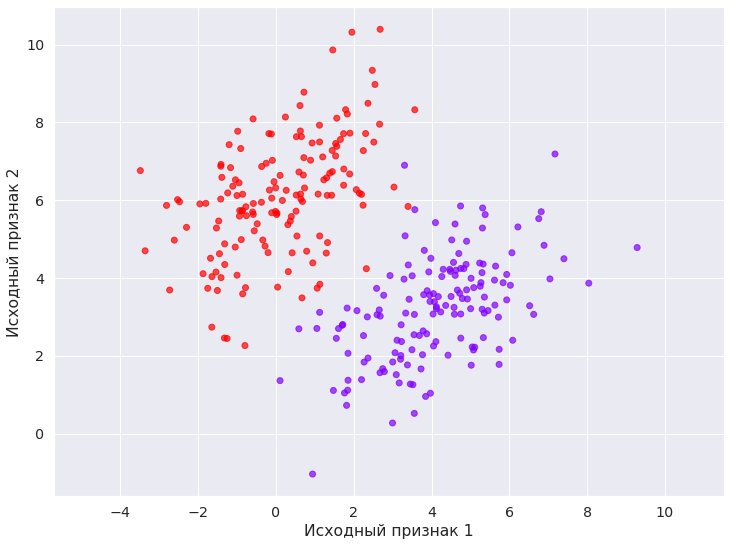

In [ ]:
a = sp.stats.multivariate_normal.rvs(size=150, mean=[4, 3], 
                                     cov=[[2, 1], [1, 2]])
b = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 6], 
                                     cov=[[2, 1], [1, 2]])
X = np.vstack([a, b])
c = np.hstack([np.zeros(len(a)), np.ones(len(b))])

plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.7, cmap='rainbow')
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.xlim((-5, 9)), plt.ylim((-1, 10))
plt.axis('equal')
plt.show()

Проецируем на одномерное подпространство, тут хорошо заметна пространственная структура классов.

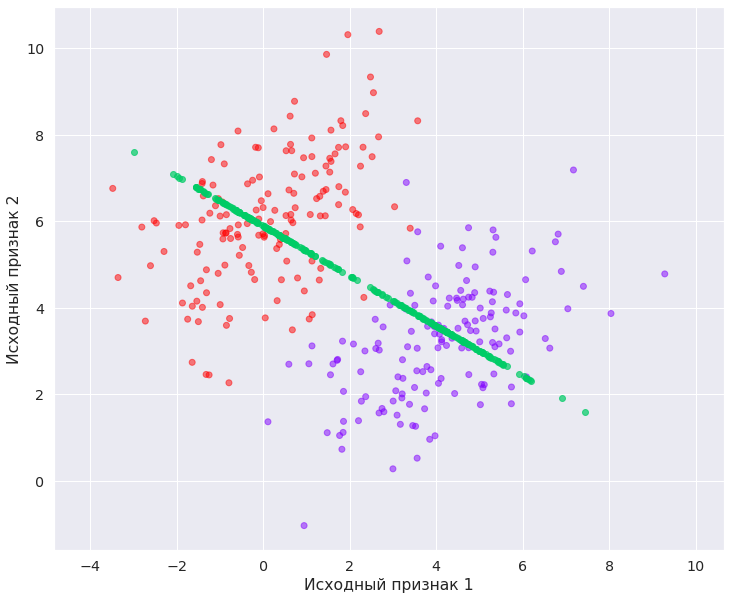

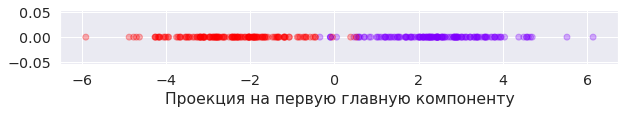

In [ ]:
pca = PCA(n_components=1)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)

plt.figure(figsize=(12, 10))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='rainbow')
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=green, alpha=0.7)
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.xlim((-5, 9)), plt.ylim((-1, 10))
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), c=c, alpha=0.3, cmap='rainbow')
plt.xlabel('Проекция на первую главную компоненту')
plt.show()

А что, если два вытянутых класса, расположенных близко, как на рисунке ниже? Сгенерируем и визуализируем такие классы.

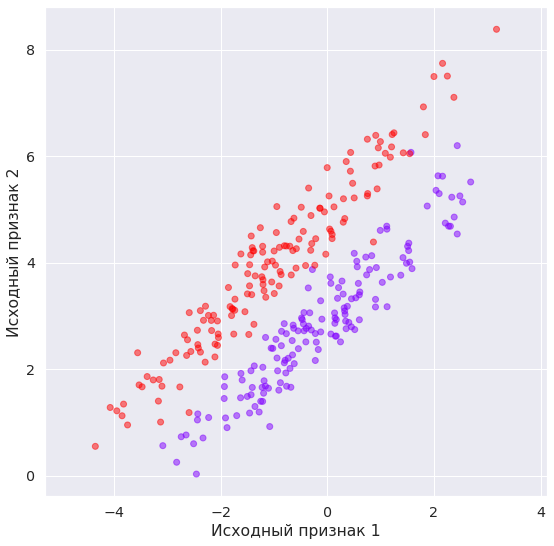

In [ ]:
a = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 3], 
                                     cov=[[2, 1.9], [1.9, 2]])
b = sp.stats.multivariate_normal.rvs(size=150, mean=[-1, 4], 
                                     cov=[[2, 1.9], [1.9, 2]])
X = np.vstack([a, b])
c = np.hstack([np.zeros(len(a)), np.ones(len(b))])

plt.figure(figsize=(9, 9))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='rainbow')
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.xlim((-5, 5)), plt.ylim((-1, 9))
plt.axis('equal')
plt.show()

Главная компонента направлена вдоль этих классов, и при проецировании точки классов смешаются.

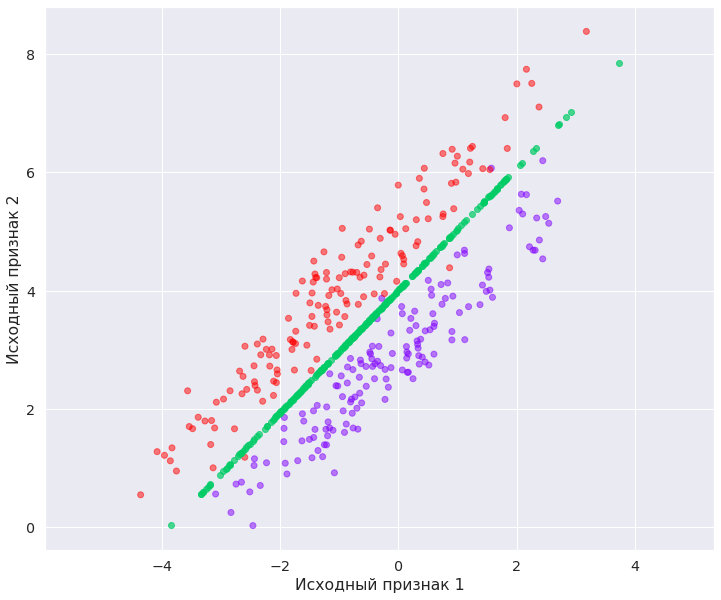

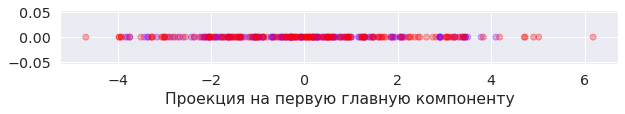

In [ ]:
pca = PCA(n_components=1)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)

plt.figure(figsize=(12, 10))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='rainbow')
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=green, alpha=0.7)
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.xlim((-5, 5)), plt.ylim((-1, 9))
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), c=c, alpha=0.3, cmap='rainbow')
plt.xlabel('Проекция на первую главную компоненту')
plt.show()

Генерируем трехмерный датасет.

In [ ]:
a = sp.stats.multivariate_normal.rvs(size=150, mean=[-2, 1, 0], 
                                     cov=[[3, -1, 1], 
                                          [-1, 4, 0.5], 
                                          [1, 0.5, 1.5]])
b = sp.stats.multivariate_normal.rvs(size=150, mean=[7, 3, 4], 
                                     cov=[[3, 2, 1], 
                                          [2, 4, 0.5], 
                                          [1, 0.5, 1.5]])
X = np.vstack([a, b])
c = np.hstack([np.zeros(len(a)), np.ones(len(b))])

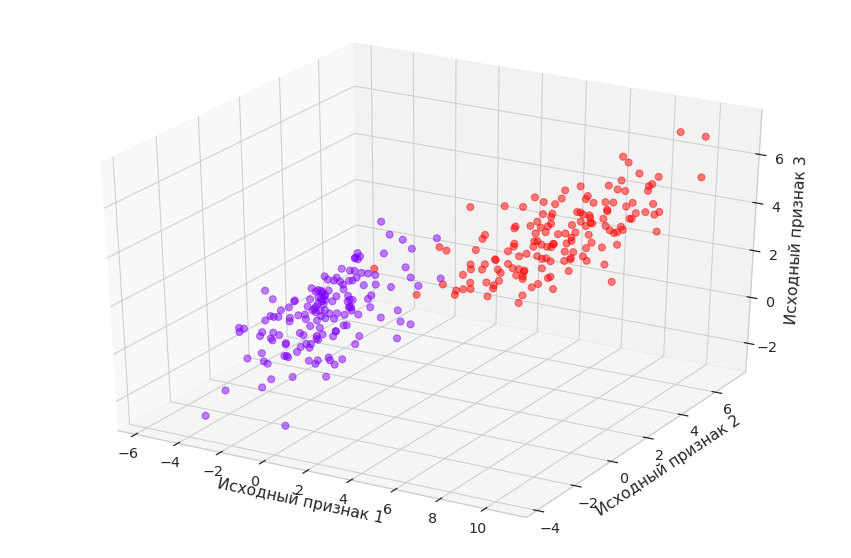

In [ ]:
sns.set(font_scale=1.3, style='whitegrid')

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           s=50, c=c, alpha=0.5, cmap='rainbow')
ax.set_xlabel('Исходный признак 1')
ax.set_ylabel('Исходный признак 2')
ax.set_zlabel('Исходный признак 3')
# ax.axis('equal')
plt.show()

Посмотрим на проекции на две первые главные компоненты.

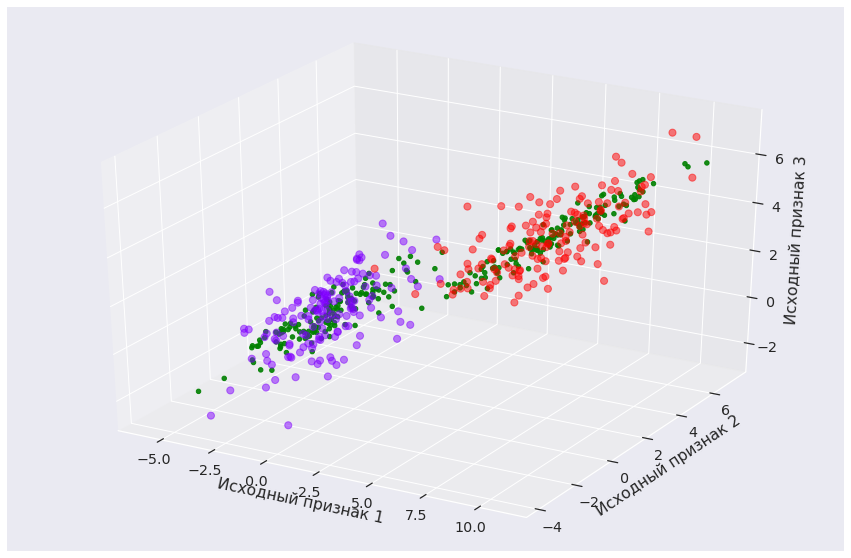

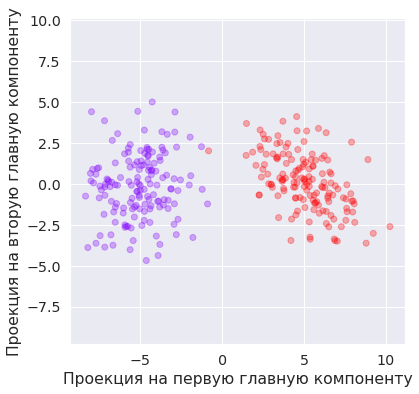

In [ ]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           s=50, c=c, alpha=0.5, cmap='rainbow')
ax.scatter(X_hat[:, 0], X_hat[:, 1], X_hat[:, 2], 
           s=20, c='green', alpha=0.9)
ax.set_xlabel('Исходный признак 1')
ax.set_ylabel('Исходный признак 2')
ax.set_zlabel('Исходный признак 3')
# ax.axis('equal')
plt.show()

sns.set(font_scale=1.3)
plt.figure(figsize=(6, 6))
plt.scatter(Y[:, 0], Y[:, 1], c=c, alpha=0.3, cmap='rainbow')
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.axis('equal')
plt.show()

In [ ]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

Нарисуем интерактивный график для удобной визуализации.

In [ ]:
fig = go.Figure()
fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
)

fig.add_trace(go.Scatter3d(
    x=X[c==0, 0], y=X[c==0, 1], z=X[c==0, 2], mode='markers',
    marker={'size': 7, 'opacity': 0.65, 'color': red}
))

fig.add_trace(go.Scatter3d(
    x=X[c==1, 0], y=X[c==1, 1], z=X[c==1, 2], mode='markers',
    marker={'size': 7, 'opacity': 0.65, 'color': blue}
))

fig.add_trace(go.Scatter3d(
    x=X_hat[:, 0], y=X_hat[:, 1], z=X_hat[:, 2], mode='markers',
    marker={'size': 4, 'opacity': 0.9, 'color': green}
))

fig.update_layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
        scene = dict(
            xaxis_title='Признак 1',
            yaxis_title='Признак 2',
            zaxis_title='Признак 3',
        )
    )

# Отображение.
plotly.offline.iplot(fig)

# Другие методы снижения размерности

http://scikit-learn.org/stable/modules/manifold.html#manifold

Примеры:

http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py